# Pre-Processing

In [1]:
!pip install colorthief
!pip install imageio scikit-image

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from colorthief import ColorThief
from skimage import io
from skimage.color import rgb2lab, deltaE_cie76
import numpy as np
import random
import shutil
import skimage.measure
import imageio
from PIL import Image
import colorsys

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
seed_value = 32
random.seed(seed_value)

In [5]:
path = "/content/drive/MyDrive/winter2024/cmplxsys351/project/data/artists.csv"
artists = pd.read_csv(path, header=0)

# removing badly processed name in 'resized' folder, or not all images present in dataset
artists.drop(artists[artists['name'] == 'Albrecht Dürer'].index, inplace=True)
artists.drop(artists[artists['name'] == 'Diego Velazquez'].index, inplace=True)

artists

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194
5,5,Salvador Dali,1904 - 1989,Surrealism,Spanish,Salvador Domingo Felipe Jacinto Dalí i Domènec...,http://en.wikipedia.org/wiki/Salvador_Dalí,139
6,6,Edouard Manet,1832 - 1883,"Realism,Impressionism",French,Édouard Manet (US: ; UK: ; French: [edwaʁ manɛ...,http://en.wikipedia.org/wiki/Édouard_Manet,90
7,7,Andrei Rublev,1360 - 1430,Byzantine Art,Russian,"Andrei Rublev (Russian: Андре́й Рублёв, IPA: [...",http://en.wikipedia.org/wiki/Andrei_Rublev,99
8,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877
9,9,Gustav Klimt,1862 - 1918,"Symbolism,Art Nouveau",Austrian,"Gustav Klimt (July 14, 1862 – February 6, 1918...",http://en.wikipedia.org/wiki/Gustav_Klimt,117


In [6]:
# ONLY RUN ONCE TO GET RANDOM VALUES OF 20 IMAGES PER ARTIST

# def select_random_images(artist_row, num_imgs):
#     artist_name = artist_row['name'].replace(' ', '_')
#     num_total_imgs = artist_row['paintings']

#     selected_img_numbers = random.sample(range(1, num_total_imgs + 1), num_imgs)

#     selected_img_filenames = [f"{artist_name}_{number}.jpg" for number in selected_img_numbers]

#     return selected_img_filenames

# artists['20_img_filenames'] = artists.apply(select_random_images, args=(20,), axis=1)

In [7]:
# ONLY RUN ONCE TO POPULATE NEW FOLDER OF 20 IMAGES PER ARTIST!!!

# resized_path = "/content/drive/MyDrive/winter2024/cmplxsys351/project/data/resized"
# dest_20_folder = "/content/drive/MyDrive/winter2024/cmplxsys351/project/data/resized_20"
# os.makedirs(dest_20_folder, exist_ok=True)

# def copy_selected_images(selected_images, destination_folder):
#     for image_filename in selected_images:
#         source_path = os.path.join(resized_path, image_filename)
#         destination_path = os.path.join(destination_folder, image_filename)
#         shutil.copy(source_path, destination_path)

# artists.apply(lambda row: copy_selected_images(row['20_img_filenames'], dest_20_folder), axis=1)

In [8]:
resized_20_path = "/content/drive/MyDrive/winter2024/cmplxsys351/project/data/resized_20"

img_list = [f for f in os.listdir(resized_20_path) if f.endswith('.jpg')]
imgs = pd.DataFrame(img_list, columns=['image_name'])
imgs

,image_name
0,Amedeo_Modigliani_33.jpg
1,Amedeo_Modigliani_187.jpg
2,Amedeo_Modigliani_50.jpg
3,Amedeo_Modigliani_66.jpg
4,Amedeo_Modigliani_9.jpg
...,...
955,Jackson_Pollock_4.jpg
956,Jackson_Pollock_7.jpg
957,Jackson_Pollock_20.jpg
958,Jackson_Pollock_2.jpg


# Dominant Colors

In [9]:
def get_dominant_color(img_name):
  color_thief = ColorThief(f'/content/drive/MyDrive/winter2024/cmplxsys351/project/data/resized_20/{img_name}')
  dominant_color = color_thief.get_color(quality=10)

  return dominant_color

imgs['dominant_color'] = imgs['image_name'].apply(get_dominant_color)
imgs

,image_name,dominant_color
0,Amedeo_Modigliani_33.jpg,"(188, 115, 34)"
1,Amedeo_Modigliani_187.jpg,"(182, 138, 89)"
2,Amedeo_Modigliani_50.jpg,"(23, 24, 23)"
3,Amedeo_Modigliani_66.jpg,"(210, 142, 60)"
4,Amedeo_Modigliani_9.jpg,"(42, 47, 39)"
...,...,...
955,Jackson_Pollock_4.jpg,"(199, 181, 142)"
956,Jackson_Pollock_7.jpg,"(45, 42, 62)"
957,Jackson_Pollock_20.jpg,"(232, 222, 185)"
958,Jackson_Pollock_2.jpg,"(183, 161, 141)"


In [10]:
# Merging artists and imgs dataframes
merged_df_list = []

for _, artist_row in artists.iterrows():
    artist_name = artist_row['name']
    artist_name = artist_name.replace(' ', '_')

    img_data = imgs[imgs['image_name'].str.contains(artist_name)].copy()
    img_data['artist_name'] = artist_row['name']
    img_data['artist_genre'] = artist_row['genre']
    img_data['artist_nationality'] = artist_row['nationality']
    merged_df_list.append(img_data)

merged_df = pd.concat(merged_df_list, ignore_index=True)
merged_df

,image_name,dominant_color,artist_name,artist_genre,artist_nationality
0,Amedeo_Modigliani_33.jpg,"(188, 115, 34)",Amedeo Modigliani,Expressionism,Italian
1,Amedeo_Modigliani_187.jpg,"(182, 138, 89)",Amedeo Modigliani,Expressionism,Italian
2,Amedeo_Modigliani_50.jpg,"(23, 24, 23)",Amedeo Modigliani,Expressionism,Italian
3,Amedeo_Modigliani_66.jpg,"(210, 142, 60)",Amedeo Modigliani,Expressionism,Italian
4,Amedeo_Modigliani_9.jpg,"(42, 47, 39)",Amedeo Modigliani,Expressionism,Italian
...,...,...,...,...,...
955,Jackson_Pollock_4.jpg,"(199, 181, 142)",Jackson Pollock,Abstract Expressionism,American
956,Jackson_Pollock_7.jpg,"(45, 42, 62)",Jackson Pollock,Abstract Expressionism,American
957,Jackson_Pollock_20.jpg,"(232, 222, 185)",Jackson Pollock,Abstract Expressionism,American
958,Jackson_Pollock_2.jpg,"(183, 161, 141)",Jackson Pollock,Abstract Expressionism,American


In [11]:
# To make it easier to work with
imgs = merged_df
imgs

,image_name,dominant_color,artist_name,artist_genre,artist_nationality
0,Amedeo_Modigliani_33.jpg,"(188, 115, 34)",Amedeo Modigliani,Expressionism,Italian
1,Amedeo_Modigliani_187.jpg,"(182, 138, 89)",Amedeo Modigliani,Expressionism,Italian
2,Amedeo_Modigliani_50.jpg,"(23, 24, 23)",Amedeo Modigliani,Expressionism,Italian
3,Amedeo_Modigliani_66.jpg,"(210, 142, 60)",Amedeo Modigliani,Expressionism,Italian
4,Amedeo_Modigliani_9.jpg,"(42, 47, 39)",Amedeo Modigliani,Expressionism,Italian
...,...,...,...,...,...
955,Jackson_Pollock_4.jpg,"(199, 181, 142)",Jackson Pollock,Abstract Expressionism,American
956,Jackson_Pollock_7.jpg,"(45, 42, 62)",Jackson Pollock,Abstract Expressionism,American
957,Jackson_Pollock_20.jpg,"(232, 222, 185)",Jackson Pollock,Abstract Expressionism,American
958,Jackson_Pollock_2.jpg,"(183, 161, 141)",Jackson Pollock,Abstract Expressionism,American


# Calculating Delta E

In [12]:
# by artist
for _, imgs_row in imgs.iterrows():
  artist_name = imgs_row['artist_name']


  dom_color_1 = imgs_row['dominant_color']
  dom_color_1 = np.uint8(np.asarray([[dom_color_1]]))
  dom_color_1 = rgb2lab(dom_color_1)

  deltaEList = []

  for dom_color_2 in imgs['dominant_color'][imgs['artist_name'] == artist_name]:
    dom_color_2 = np.uint8(np.asarray([[dom_color_2]]))
    dom_color_2 = rgb2lab(dom_color_2)

    delta = deltaE_cie76(dom_color_1, dom_color_2)
    deltaEList.append(delta)

  mean_deltaE = np.mean(deltaEList)
  imgs.at[_, 'mean_delta_E_artist'] = mean_deltaE


In [13]:
# by genre
for _, imgs_row in imgs.iterrows():
  genre = imgs_row['artist_genre']

  dom_color_1 = imgs_row['dominant_color']
  dom_color_1 = np.uint8(np.asarray([[dom_color_1]]))
  dom_color_1 = rgb2lab(dom_color_1)

  deltaEList = []

  for dom_color_2 in imgs['dominant_color'][imgs['artist_genre'] == genre]:
    dom_color_2 = np.uint8(np.asarray([[dom_color_2]]))
    dom_color_2 = rgb2lab(dom_color_2)

    delta = deltaE_cie76(dom_color_1, dom_color_2)
    deltaEList.append(delta)

  mean_deltaE = np.mean(deltaEList)
  imgs.at[_, 'mean_delta_E_genre'] = mean_deltaE


In [14]:
# by nationality
for _, imgs_row in imgs.iterrows():
  nationality = imgs_row['artist_nationality']

  dom_color_1 = imgs_row['dominant_color']
  dom_color_1 = np.uint8(np.asarray([[dom_color_1]]))
  dom_color_1 = rgb2lab(dom_color_1)

  deltaEList = []

  for dom_color_2 in imgs['dominant_color'][imgs['artist_nationality'] == nationality]:
    dom_color_2 = np.uint8(np.asarray([[dom_color_2]]))
    dom_color_2 = rgb2lab(dom_color_2)

    delta = deltaE_cie76(dom_color_1, dom_color_2)
    deltaEList.append(delta)

  mean_deltaE = np.mean(deltaEList)
  imgs.at[_, 'mean_delta_E_nationality'] = mean_deltaE


In [15]:
imgs

,image_name,dominant_color,artist_name,artist_genre,artist_nationality,mean_delta_E_artist,mean_delta_E_genre,mean_delta_E_nationality
0,Amedeo_Modigliani_33.jpg,"(188, 115, 34)",Amedeo Modigliani,Expressionism,Italian,45.008538,45.008538,50.814086
1,Amedeo_Modigliani_187.jpg,"(182, 138, 89)",Amedeo Modigliani,Expressionism,Italian,36.727978,36.727978,35.553437
2,Amedeo_Modigliani_50.jpg,"(23, 24, 23)",Amedeo Modigliani,Expressionism,Italian,44.769139,44.769139,40.615992
3,Amedeo_Modigliani_66.jpg,"(210, 142, 60)",Amedeo Modigliani,Expressionism,Italian,45.729227,45.729227,50.970198
4,Amedeo_Modigliani_9.jpg,"(42, 47, 39)",Amedeo Modigliani,Expressionism,Italian,38.789789,38.789789,33.904901
...,...,...,...,...,...,...,...,...
955,Jackson_Pollock_4.jpg,"(199, 181, 142)",Jackson Pollock,Abstract Expressionism,American,35.563695,35.563695,41.481164
956,Jackson_Pollock_7.jpg,"(45, 42, 62)",Jackson Pollock,Abstract Expressionism,American,38.341761,38.341761,44.328676
957,Jackson_Pollock_20.jpg,"(232, 222, 185)",Jackson Pollock,Abstract Expressionism,American,45.700196,45.700196,50.591209
958,Jackson_Pollock_2.jpg,"(183, 161, 141)",Jackson Pollock,Abstract Expressionism,American,30.121337,30.121337,36.756809


# Calculating Entropy

In [16]:
resized_path = '/content/drive/MyDrive/winter2024/cmplxsys351/project/data/resized_20'
for _, imgs_row in imgs.iterrows():
  img_path = os.path.join(resized_path, imgs_row['image_name'])
  img = Image.open(img_path)
  gray_img = img.convert('L')

  entropy = skimage.measure.shannon_entropy(gray_img)

  imgs.at[_, 'entropy'] = entropy


In [17]:
imgs

,image_name,dominant_color,artist_name,artist_genre,artist_nationality,mean_delta_E_artist,mean_delta_E_genre,mean_delta_E_nationality,entropy
0,Amedeo_Modigliani_33.jpg,"(188, 115, 34)",Amedeo Modigliani,Expressionism,Italian,45.008538,45.008538,50.814086,7.671537
1,Amedeo_Modigliani_187.jpg,"(182, 138, 89)",Amedeo Modigliani,Expressionism,Italian,36.727978,36.727978,35.553437,7.463991
2,Amedeo_Modigliani_50.jpg,"(23, 24, 23)",Amedeo Modigliani,Expressionism,Italian,44.769139,44.769139,40.615992,6.843407
3,Amedeo_Modigliani_66.jpg,"(210, 142, 60)",Amedeo Modigliani,Expressionism,Italian,45.729227,45.729227,50.970198,7.215076
4,Amedeo_Modigliani_9.jpg,"(42, 47, 39)",Amedeo Modigliani,Expressionism,Italian,38.789789,38.789789,33.904901,7.010936
...,...,...,...,...,...,...,...,...,...
955,Jackson_Pollock_4.jpg,"(199, 181, 142)",Jackson Pollock,Abstract Expressionism,American,35.563695,35.563695,41.481164,7.932300
956,Jackson_Pollock_7.jpg,"(45, 42, 62)",Jackson Pollock,Abstract Expressionism,American,38.341761,38.341761,44.328676,7.694092
957,Jackson_Pollock_20.jpg,"(232, 222, 185)",Jackson Pollock,Abstract Expressionism,American,45.700196,45.700196,50.591209,7.114272
958,Jackson_Pollock_2.jpg,"(183, 161, 141)",Jackson Pollock,Abstract Expressionism,American,30.121337,30.121337,36.756809,7.819352


# Calculating HSV Values

In [18]:
def rgb_to_hsv(rgb):
    r, g, b = rgb
    h, s, v = colorsys.rgb_to_hsv(r / 255.0, g / 255.0, b / 255.0)
    return h, s, v

imgs['dominant_color_hsv'] = imgs['dominant_color'].apply(rgb_to_hsv)
imgs

,image_name,dominant_color,artist_name,artist_genre,artist_nationality,mean_delta_E_artist,mean_delta_E_genre,mean_delta_E_nationality,entropy,dominant_color_hsv
0,Amedeo_Modigliani_33.jpg,"(188, 115, 34)",Amedeo Modigliani,Expressionism,Italian,45.008538,45.008538,50.814086,7.671537,"(0.08766233766233766, 0.8191489361702128, 0.73..."
1,Amedeo_Modigliani_187.jpg,"(182, 138, 89)",Amedeo Modigliani,Expressionism,Italian,36.727978,36.727978,35.553437,7.463991,"(0.08781362007168458, 0.5109890109890111, 0.71..."
2,Amedeo_Modigliani_50.jpg,"(23, 24, 23)",Amedeo Modigliani,Expressionism,Italian,44.769139,44.769139,40.615992,6.843407,"(0.3333333333333333, 0.041666666666666664, 0.0..."
3,Amedeo_Modigliani_66.jpg,"(210, 142, 60)",Amedeo Modigliani,Expressionism,Italian,45.729227,45.729227,50.970198,7.215076,"(0.0911111111111111, 0.7142857142857142, 0.823..."
4,Amedeo_Modigliani_9.jpg,"(42, 47, 39)",Amedeo Modigliani,Expressionism,Italian,38.789789,38.789789,33.904901,7.010936,"(0.2708333333333334, 0.1702127659574468, 0.184..."
...,...,...,...,...,...,...,...,...,...,...
955,Jackson_Pollock_4.jpg,"(199, 181, 142)",Jackson Pollock,Abstract Expressionism,American,35.563695,35.563695,41.481164,7.932300,"(0.11403508771929827, 0.28643216080402006, 0.7..."
956,Jackson_Pollock_7.jpg,"(45, 42, 62)",Jackson Pollock,Abstract Expressionism,American,38.341761,38.341761,44.328676,7.694092,"(0.6916666666666668, 0.3225806451612903, 0.243..."
957,Jackson_Pollock_20.jpg,"(232, 222, 185)",Jackson Pollock,Abstract Expressionism,American,45.700196,45.700196,50.591209,7.114272,"(0.13120567375886527, 0.20258620689655174, 0.9..."
958,Jackson_Pollock_2.jpg,"(183, 161, 141)",Jackson Pollock,Abstract Expressionism,American,30.121337,30.121337,36.756809,7.819352,"(0.07936507936507932, 0.22950819672131142, 0.7..."


In [19]:
imgs['hue'] = imgs['dominant_color_hsv'].apply(lambda x: x[0])

In [20]:
imgs['saturation'] = imgs['dominant_color_hsv'].apply(lambda x: x[1])

In [21]:
imgs['value'] = imgs['dominant_color_hsv'].apply(lambda x: x[2])

# Comparing By Artist

In [22]:
imgs['artist_delta_E'] = imgs.groupby('artist_name')['mean_delta_E_artist'].transform('mean')
unique_artist_deltae = imgs[['artist_name', 'artist_delta_E']].drop_duplicates()
sorted_artist_deltae = unique_artist_deltae.sort_values(by='artist_delta_E')
sorted_artist_deltae

,artist_name,artist_delta_E
580,Rembrandt,19.419832
920,Michelangelo,19.857811
740,Eugene Delacroix,21.595432
280,Peter Paul Rubens,21.655284
540,Jan van Eyck,22.107673
440,Giotto di Bondone,22.603130
300,Pierre-Auguste Renoir,22.665316
60,Claude Monet,23.920998
780,Georges Seurat,23.985730
660,Camille Pissarro,24.496405


In [23]:
imgs['artist_entropy'] = imgs.groupby('artist_name')['entropy'].transform('mean')
unique_artist_entropy = imgs[['artist_name', 'artist_entropy']].drop_duplicates()
sorted_artist_entropy = unique_artist_entropy.sort_values(by='artist_entropy')
sorted_artist_entropy

,artist_name,artist_entropy
580,Rembrandt,6.404482
180,Gustav Klimt,6.422299
480,Caravaggio,6.465298
860,Andy Warhol,6.526654
220,Kazimir Malevich,6.581167
820,Piet Mondrian,6.771441
320,Francisco Goya,6.808296
840,Joan Miro,6.870239
500,Leonardo da Vinci,6.912291
80,Rene Magritte,6.980076


In [24]:
imgs['artist_hue'] = imgs.groupby('artist_name')['hue'].transform('mean')
unique_artist_hue = imgs[['artist_name', 'artist_hue']].drop_duplicates()
sorted_artist_hue = unique_artist_hue.sort_values(by='artist_hue')
sorted_artist_hue

,artist_name,artist_hue
440,Giotto di Bondone,0.072081
600,Titian,0.083564
340,Frida Kahlo,0.089089
620,Henri de Toulouse-Lautrec,0.097193
200,Hieronymus Bosch,0.097802
920,Michelangelo,0.115653
140,Andrei Rublev,0.129879
300,Pierre-Auguste Renoir,0.134493
480,Caravaggio,0.134609
520,Henri Matisse,0.135578


In [25]:
imgs['artist_saturation'] = imgs.groupby('artist_name')['saturation'].transform('mean')
unique_artist_saturation = imgs[['artist_name', 'artist_saturation']].drop_duplicates()
sorted_artist_saturation = unique_artist_saturation.sort_values(by='artist_saturation')
sorted_artist_saturation

,artist_name,artist_saturation
380,Alfred Sisley,0.141376
60,Claude Monet,0.179546
320,Francisco Goya,0.194809
240,Mikhail Vrubel,0.204089
180,Gustav Klimt,0.207594
920,Michelangelo,0.210489
100,Salvador Dali,0.218857
220,Kazimir Malevich,0.219134
660,Camille Pissarro,0.226502
680,William Turner,0.254054


In [26]:
imgs['artist_value'] = imgs.groupby('artist_name')['value'].transform('mean')
unique_artist_value = imgs[['artist_name', 'artist_value']].drop_duplicates()
sorted_artist_value = unique_artist_value.sort_values(by='artist_value')
sorted_artist_value

,artist_name,artist_value
580,Rembrandt,0.214314
740,Eugene Delacroix,0.298431
280,Peter Paul Rubens,0.312941
600,Titian,0.318235
540,Jan van Eyck,0.336471
640,Gustave Courbet,0.338824
480,Caravaggio,0.340392
360,El Greco,0.356078
720,Paul Cezanne,0.361961
320,Francisco Goya,0.368824


# Comparing By Genre

In [27]:
imgs['genre_delta_E'] = imgs.groupby('artist_genre')['mean_delta_E_genre'].transform('mean')
unique_genre_deltae = imgs[['artist_genre', 'genre_delta_E']].drop_duplicates()
sorted_genre_deltae = unique_genre_deltae.sort_values(by='genre_delta_E')
sorted_genre_deltae

,artist_genre,genre_delta_E
440,Proto Renaissance,22.603130
280,Baroque,24.502257
600,"High Renaissance,Mannerism",24.924017
640,Realism,25.692209
180,"Symbolism,Art Nouveau",26.247613
140,Byzantine Art,28.375157
360,Mannerism,30.422586
60,Impressionism,30.464734
120,"Realism,Impressionism",30.728496
880,"Symbolism,Post-Impressionism",30.740297


In [28]:
imgs['genre_entropy'] = imgs.groupby('artist_genre')['entropy'].transform('mean')
unique_genre_entropy = imgs[['artist_genre', 'genre_entropy']].drop_duplicates()
sorted_genre_entropy = unique_genre_entropy.sort_values(by='genre_entropy')
sorted_genre_entropy

,artist_genre,genre_entropy
180,"Symbolism,Art Nouveau",6.422299
860,Pop Art,6.526654
220,Suprematism,6.581167
280,Baroque,6.690711
820,Neoplasticism,6.771441
80,"Surrealism,Impressionism",6.980076
100,Surrealism,6.981768
600,"High Renaissance,Mannerism",7.073314
260,Cubism,7.110960
360,Mannerism,7.126865


In [29]:
imgs['genre_hue'] = imgs.groupby('artist_genre')['hue'].transform('mean')
unique_genre_hue = imgs[['artist_genre', 'genre_hue']].drop_duplicates()
sorted_genre_hue = unique_genre_hue.sort_values(by='genre_hue')
sorted_genre_hue

,artist_genre,genre_hue
440,Proto Renaissance,0.072081
600,"High Renaissance,Mannerism",0.083564
340,"Primitivism,Surrealism",0.089089
140,Byzantine Art,0.129879
500,High Renaissance,0.144362
180,"Symbolism,Art Nouveau",0.145691
280,Baroque,0.146799
800,"Expressionism,Abstractionism,Surrealism",0.153915
320,Romanticism,0.161382
240,Symbolism,0.161586


In [30]:
imgs['genre_saturation'] = imgs.groupby('artist_genre')['saturation'].transform('mean')
unique_genre_saturation = imgs[['artist_genre', 'genre_saturation']].drop_duplicates()
sorted_genre_saturation = unique_genre_saturation.sort_values(by='genre_saturation')
sorted_genre_saturation

,artist_genre,genre_saturation
240,Symbolism,0.204089
180,"Symbolism,Art Nouveau",0.207594
220,Suprematism,0.219134
940,Abstract Expressionism,0.260125
420,Primitivism,0.260462
360,Mannerism,0.266757
120,"Realism,Impressionism",0.278521
60,Impressionism,0.287309
820,Neoplasticism,0.297637
320,Romanticism,0.298025


In [31]:
imgs['genre_value'] = imgs.groupby('artist_genre')['value'].transform('mean')
unique_genre_value = imgs[['artist_genre', 'genre_value']].drop_duplicates()
sorted_genre_value = unique_genre_value.sort_values(by='genre_value')
sorted_genre_value

,artist_genre,genre_value
280,Baroque,0.289216
600,"High Renaissance,Mannerism",0.318235
640,Realism,0.338824
360,Mannerism,0.356078
460,Early Renaissance,0.382745
320,Romanticism,0.440719
120,"Realism,Impressionism",0.444510
260,Cubism,0.472941
940,Abstract Expressionism,0.479216
200,Northern Renaissance,0.486013


# Comparing By Nationality

In [32]:
imgs['nationality_delta_E'] = imgs.groupby('artist_nationality')['mean_delta_E_nationality'].transform('mean')
unique_nationality_deltae = imgs[['artist_nationality', 'nationality_delta_E']].drop_duplicates()
sorted_nationality_deltae = unique_nationality_deltae.sort_values(by='nationality_delta_E')
sorted_nationality_deltae

,artist_nationality,nationality_delta_E
380,"French,British",24.903873
180,Austrian,26.247613
680,British,29.094454
360,"Spanish,Greek",30.422586
280,Flemish,31.029015
60,French,34.028557
20,Russian,35.958661
0,Italian,36.219141
700,Norwegian,37.235673
80,Belgian,39.345366


In [33]:
imgs['nationality_entropy'] = imgs.groupby('artist_nationality')['entropy'].transform('mean')
unique_nationality_entropy = imgs[['artist_nationality', 'nationality_entropy']].drop_duplicates()
sorted_nationality_entropy = unique_nationality_entropy.sort_values(by='nationality_entropy')
sorted_nationality_entropy

,artist_nationality,nationality_entropy
180,Austrian,6.422299
100,Spanish,6.970698
80,Belgian,6.980076
160,Dutch,7.028926
860,American,7.073773
20,Russian,7.126082
380,"French,British",7.126784
360,"Spanish,Greek",7.126865
0,Italian,7.137651
420,"French,Jewish,Belarusian",7.144856


In [34]:
imgs['nationality_hue'] = imgs.groupby('artist_nationality')['hue'].transform('mean')
unique_nationality_hue = imgs[['artist_nationality', 'nationality_hue']].drop_duplicates()
sorted_nationality_hue = unique_nationality_hue.sort_values(by='nationality_hue')
sorted_nationality_hue

,artist_nationality,nationality_hue
680,British,0.145618
180,Austrian,0.145691
800,"German,Swiss",0.153915
0,Italian,0.155413
60,French,0.180298
20,Russian,0.181203
40,Mexican,0.186045
360,"Spanish,Greek",0.191758
160,Dutch,0.198941
280,Flemish,0.218466


In [35]:
imgs['nationality_saturation'] = imgs.groupby('artist_nationality')['saturation'].transform('mean')
unique_nationality_saturation = imgs[['artist_nationality', 'nationality_saturation']].drop_duplicates()
sorted_nationality_saturation = unique_nationality_saturation.sort_values(by='nationality_saturation')
sorted_nationality_saturation

,artist_nationality,nationality_saturation
380,"French,British",0.141376
180,Austrian,0.207594
680,British,0.254054
420,"French,Jewish,Belarusian",0.260168
360,"Spanish,Greek",0.266757
280,Flemish,0.305476
20,Russian,0.316119
100,Spanish,0.334847
60,French,0.340601
860,American,0.341071


In [36]:
imgs['nationality_value'] = imgs.groupby('artist_nationality')['value'].transform('mean')
unique_nationality_value = imgs[['artist_nationality', 'nationality_value']].drop_duplicates()
sorted_nationality_value = unique_nationality_value.sort_values(by='nationality_value')
sorted_nationality_value

,artist_nationality,nationality_value
360,"Spanish,Greek",0.356078
280,Flemish,0.415033
160,Dutch,0.451422
0,Italian,0.482966
60,French,0.493499
860,American,0.517549
100,Spanish,0.524804
700,Norwegian,0.530196
80,Belgian,0.537059
40,Mexican,0.591373


# Visualizations

In [37]:
def plot_dominant_colors(name, artist_df):
    fig, axes = plt.subplots(1, len(artist_df), figsize=(15, 2))

    fig.suptitle(f"Dominant Colors for {name}", fontsize=16)

    for i, (color, filename) in enumerate(zip(artist_df['dominant_color'], artist_df['image_name'])):
        axes[i].imshow([[color]])
        axes[i].axis('off')

    plt.show()

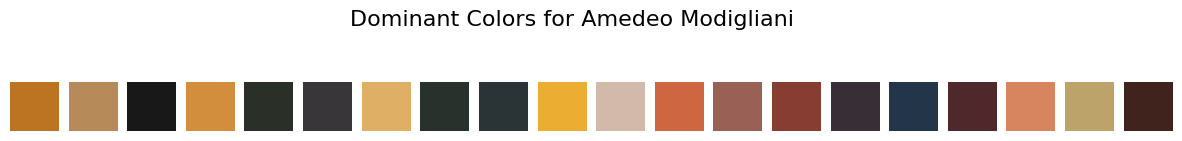

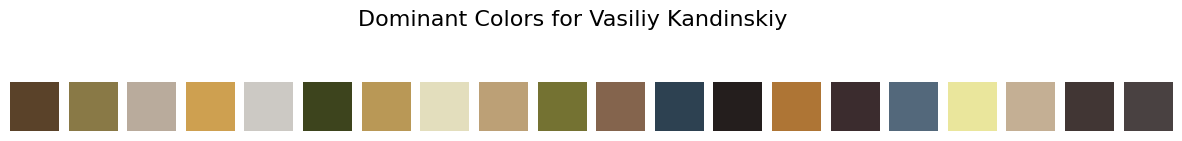

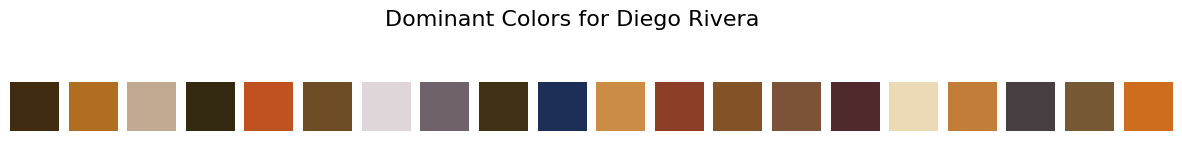

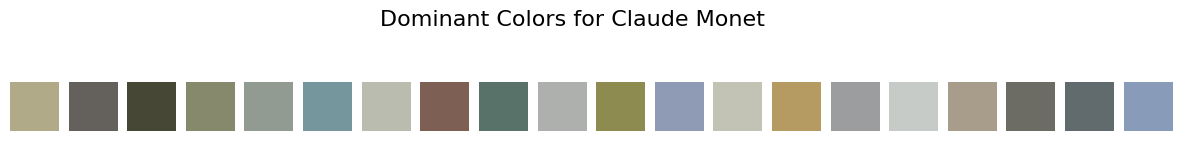

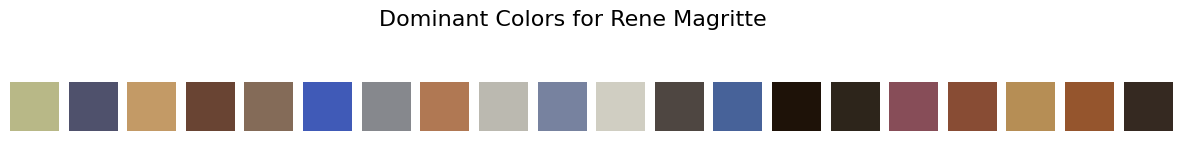

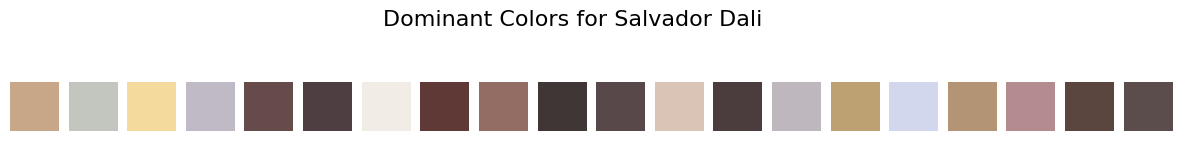

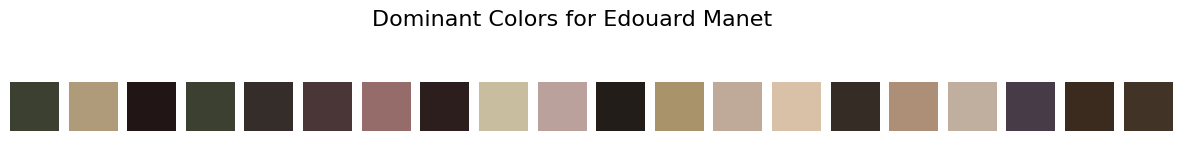

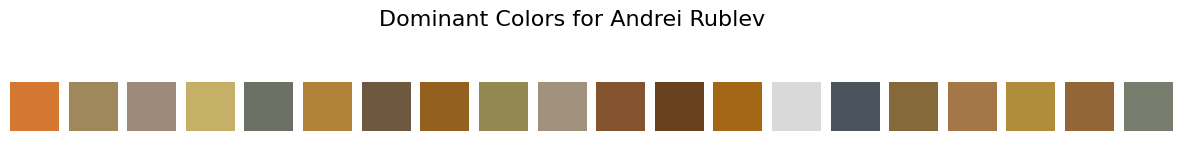

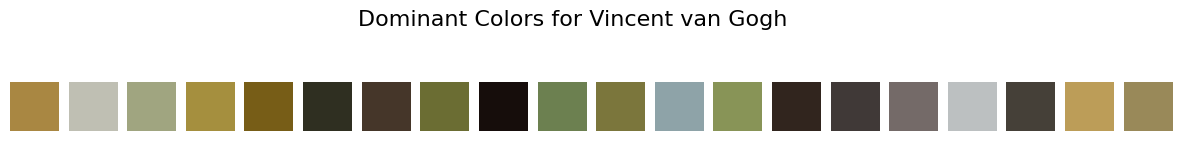

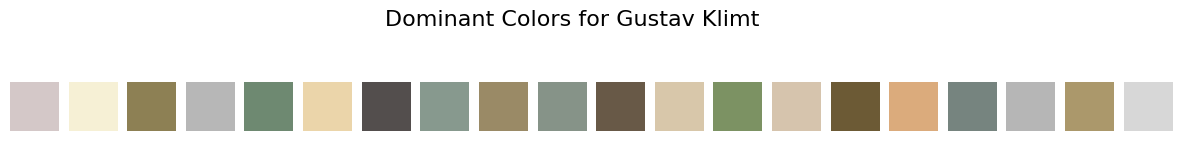

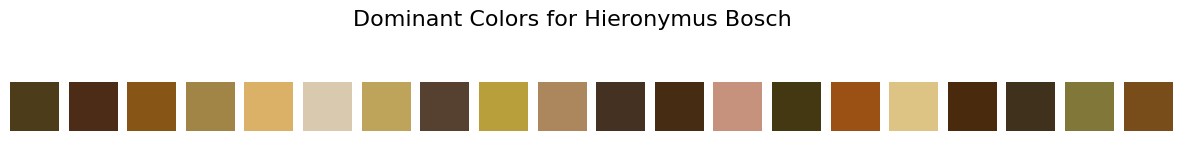

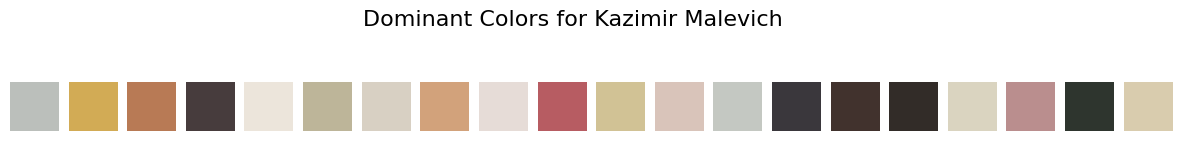

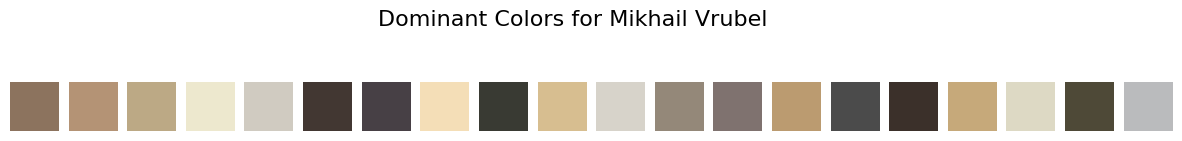

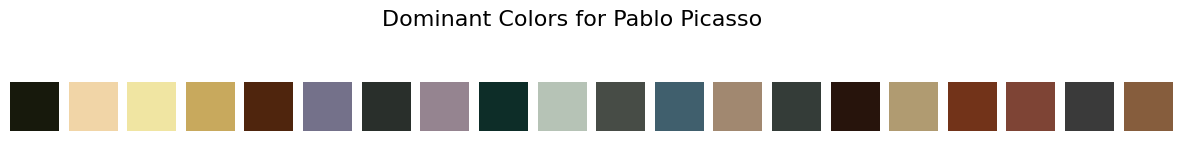

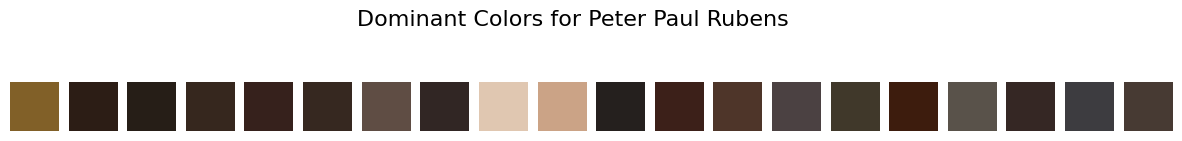

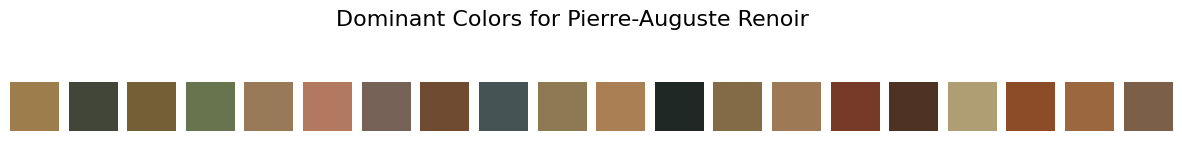

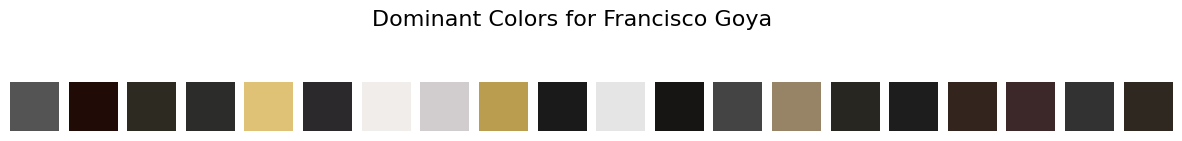

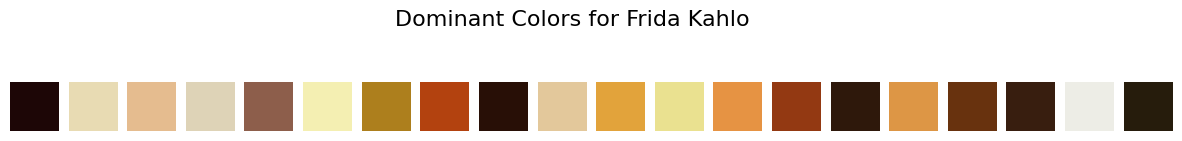

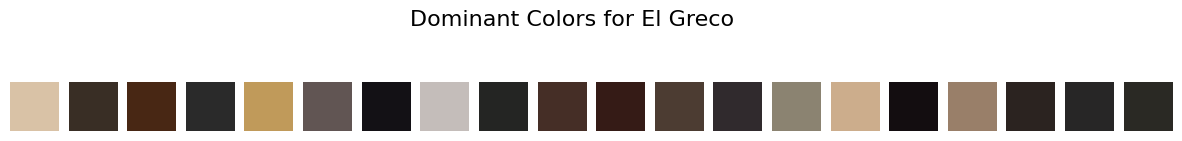

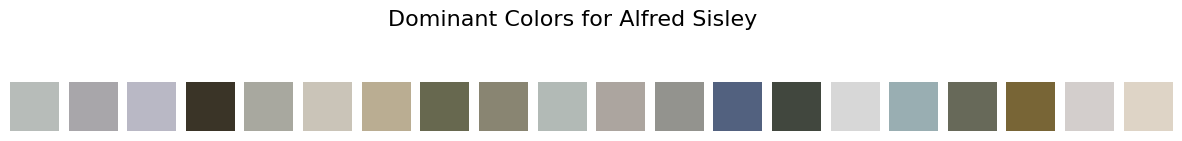

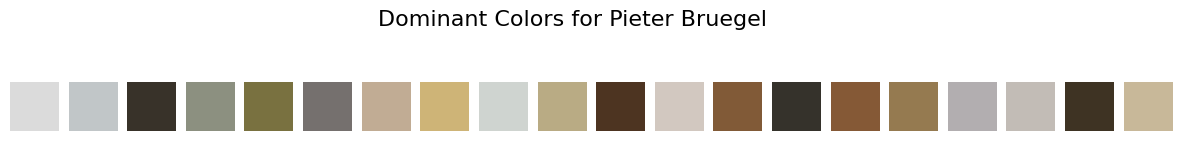

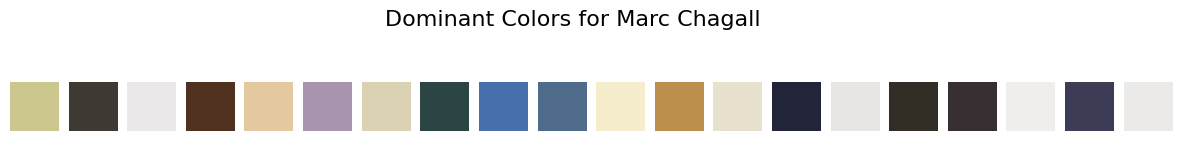

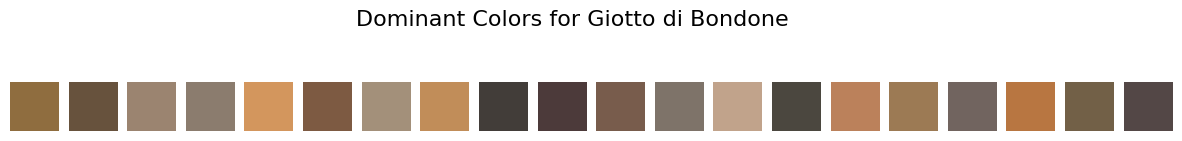

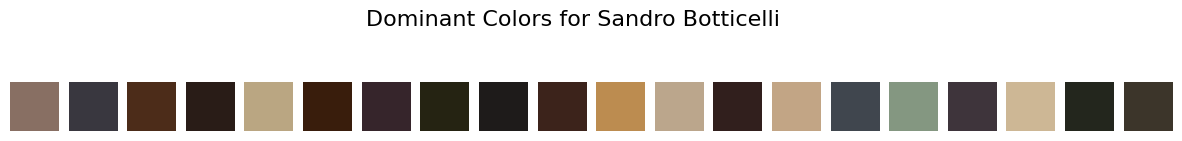

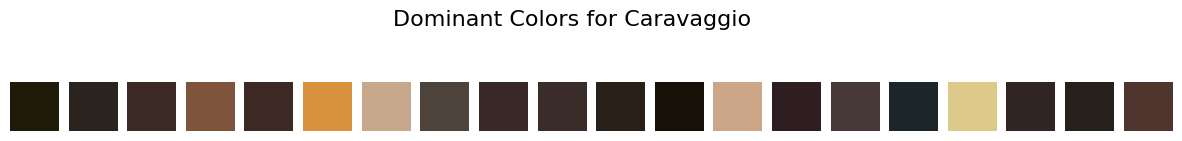

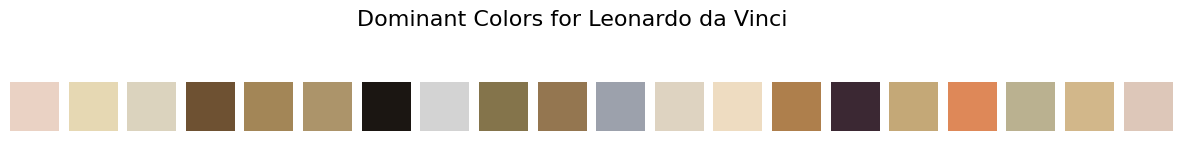

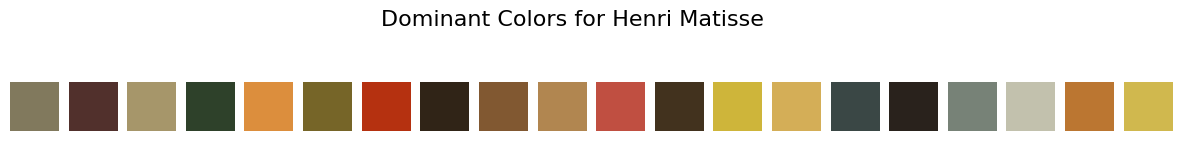

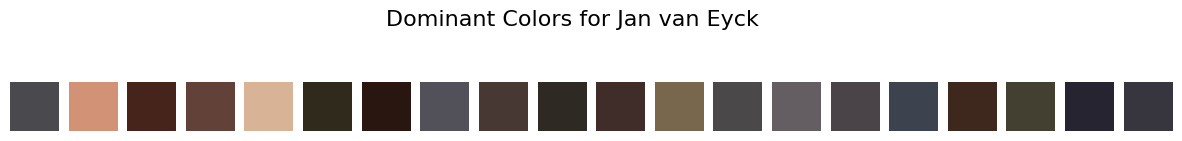

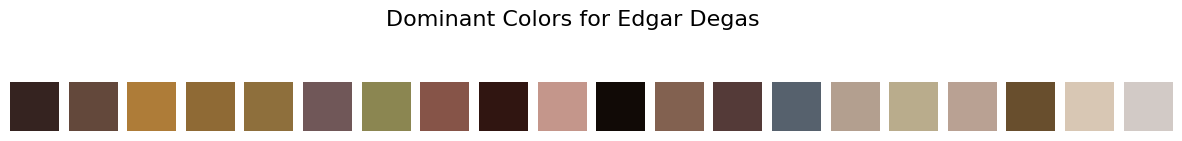

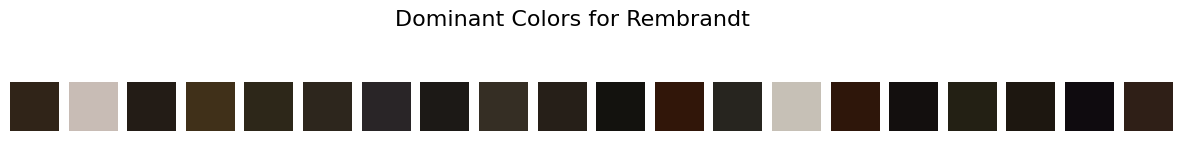

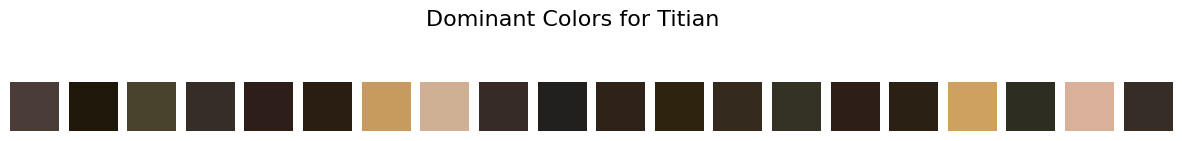

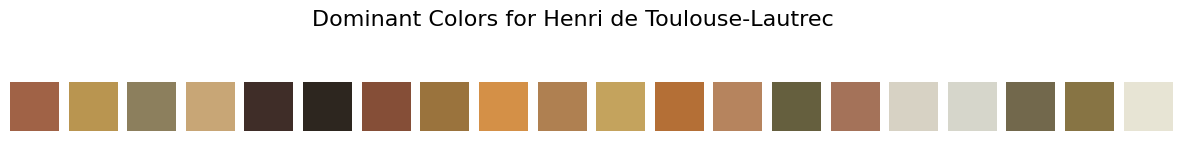

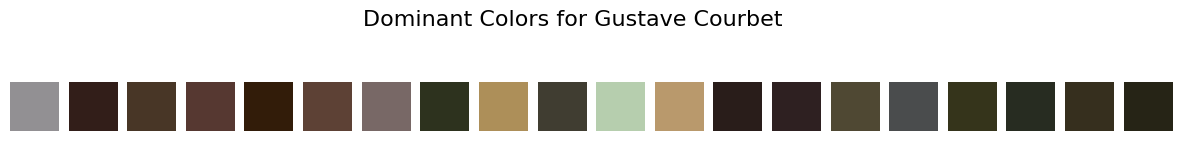

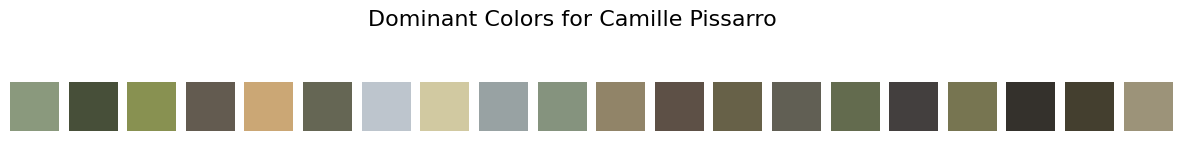

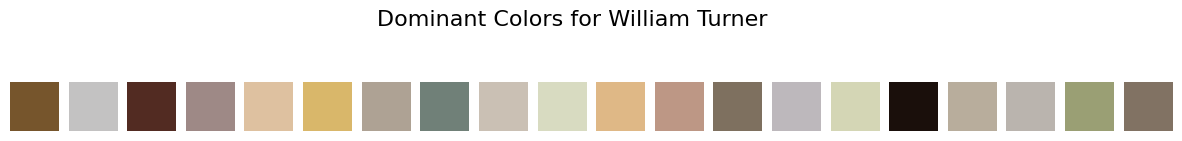

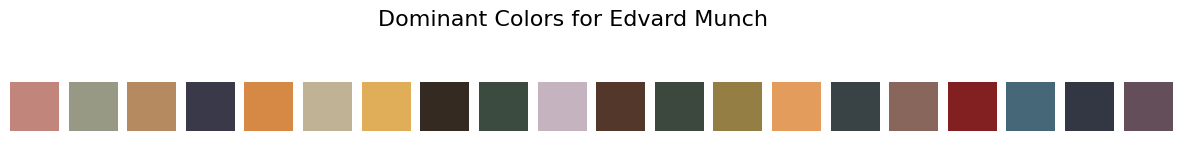

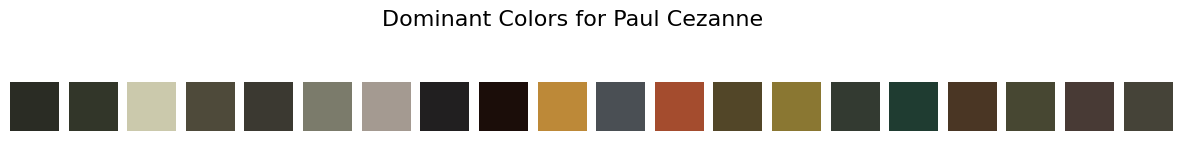

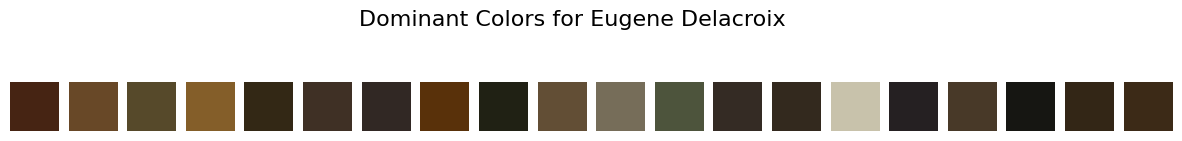

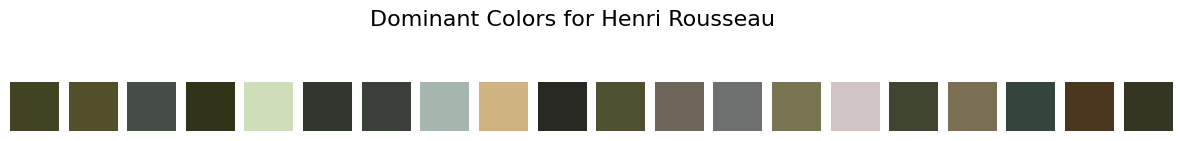

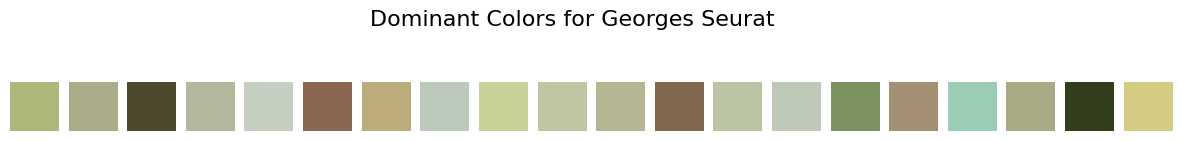

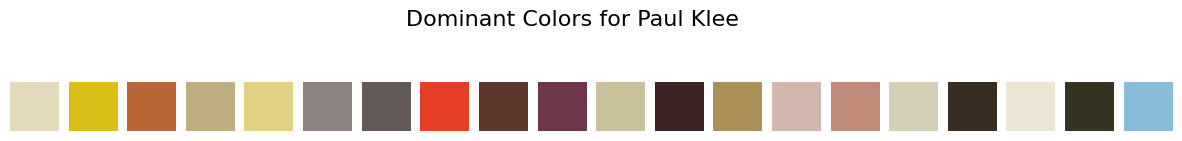

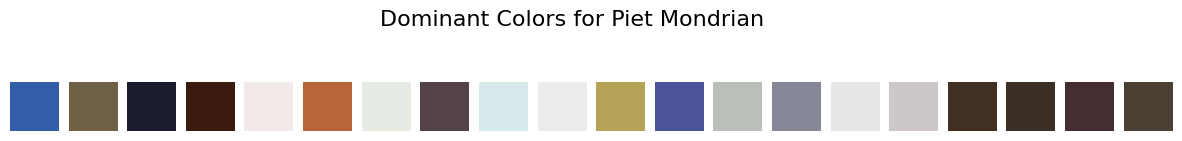

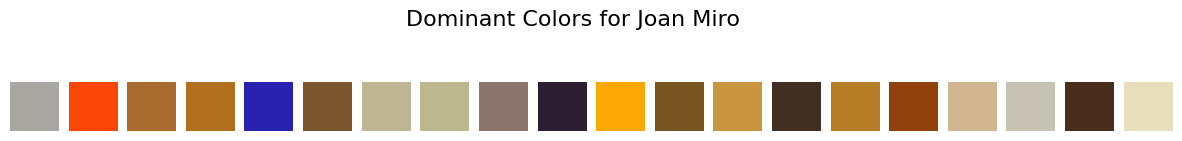

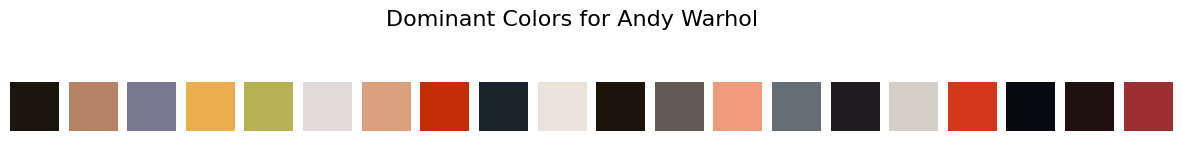

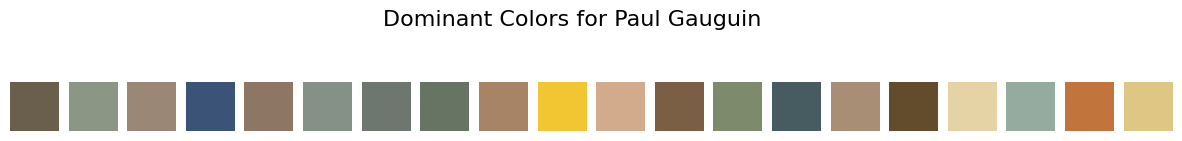

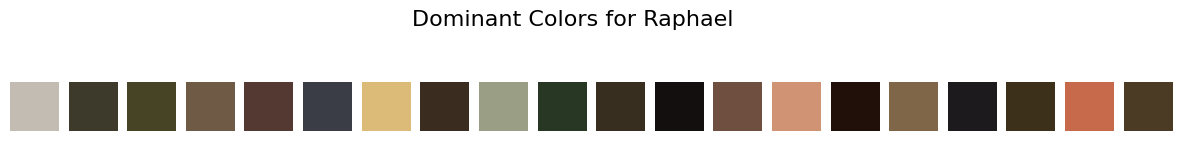

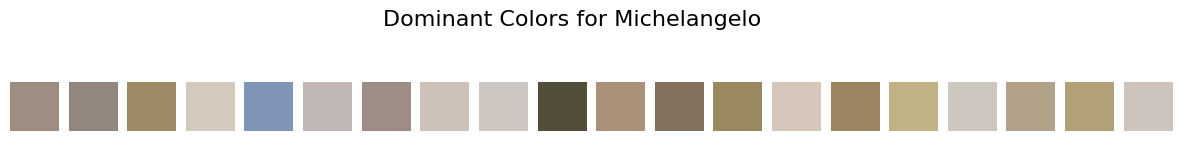

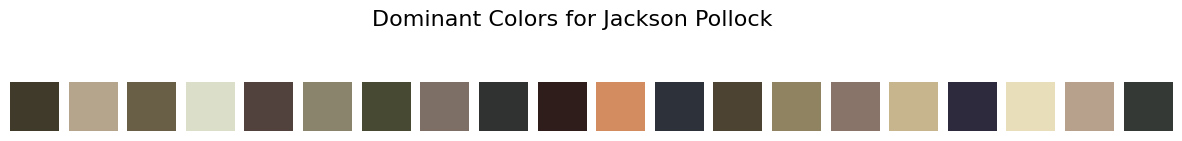

In [38]:
# visualizing dominant colors by artist
for artist_name in merged_df['artist_name'].unique():
    artist_df = merged_df[merged_df['artist_name'] == artist_name]
    plot_dominant_colors(artist_name, artist_df)

In [48]:
def get_dominant_color_string(color):
    rgb_values = ', '.join(map(str, color))
    return f"'rgb({rgb_values})',"

def print_dominant_colors(name, artist_df):
    print(f"Dominant Colors for {name}: ", end="")

    colors_string = ""
    for color in artist_df['dominant_color']:
        colors_string += get_dominant_color_string(color)

    # Remove the trailing comma and print the result
    print(colors_string.rstrip(','))

# Assuming you have imported pandas and your dataframe is named merged_df
# Display dominant colors by artist
for artist_name in merged_df['artist_name'].unique():
    artist_df = merged_df[merged_df['artist_name'] == artist_name]
    print_dominant_colors(artist_name, artist_df)


Dominant Colors for Amedeo Modigliani: 'rgb(188, 115, 34)','rgb(182, 138, 89)','rgb(23, 24, 23)','rgb(210, 142, 60)','rgb(42, 47, 39)','rgb(56, 54, 56)','rgb(223, 175, 101)','rgb(41, 49, 45)','rgb(42, 51, 54)','rgb(235, 173, 50)','rgb(210, 186, 171)','rgb(205, 102, 65)','rgb(153, 96, 85)','rgb(135, 61, 50)','rgb(56, 46, 53)','rgb(35, 53, 73)','rgb(79, 40, 44)','rgb(214, 133, 95)','rgb(188, 163, 106)','rgb(64, 35, 29)'
Dominant Colors for Vasiliy Kandinskiy: 'rgb(90, 66, 41)','rgb(137, 121, 70)','rgb(185, 171, 156)','rgb(206, 160, 80)','rgb(204, 201, 196)','rgb(61, 68, 29)','rgb(185, 152, 86)','rgb(227, 222, 189)','rgb(188, 160, 118)','rgb(116, 114, 50)','rgb(132, 100, 77)','rgb(45, 65, 81)','rgb(36, 30, 29)','rgb(174, 117, 53)','rgb(59, 44, 46)','rgb(83, 104, 123)','rgb(234, 230, 156)','rgb(196, 175, 148)','rgb(65, 54, 52)','rgb(73, 65, 65)'
Dominant Colors for Diego Rivera: 'rgb(65, 44, 18)','rgb(177, 110, 33)','rgb(193, 169, 146)','rgb(52, 42, 18)','rgb(192, 81, 33)','rgb(110, 76, 38

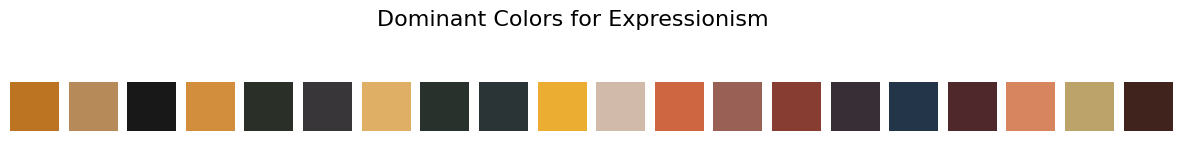

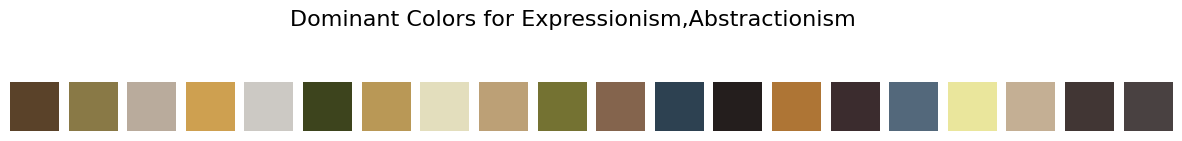

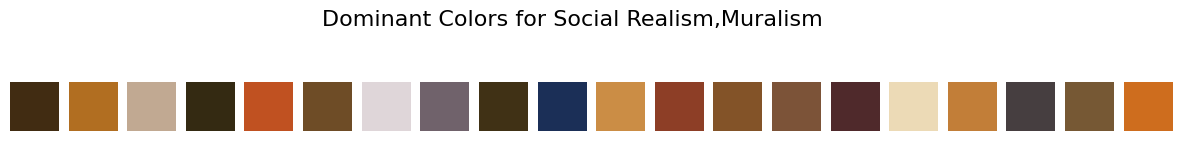

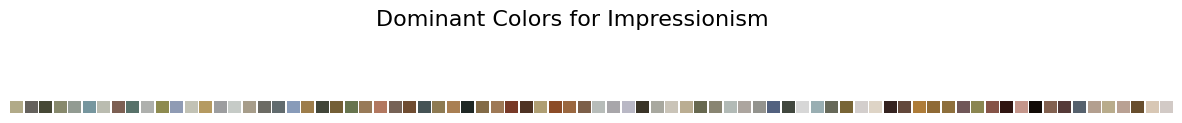

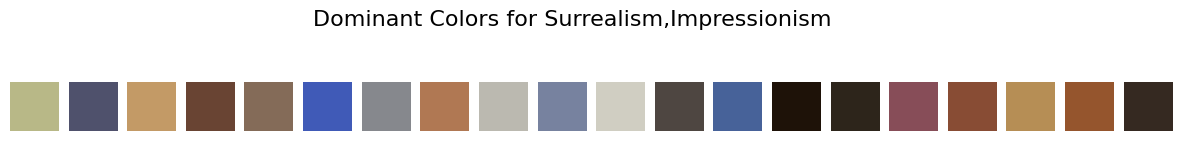

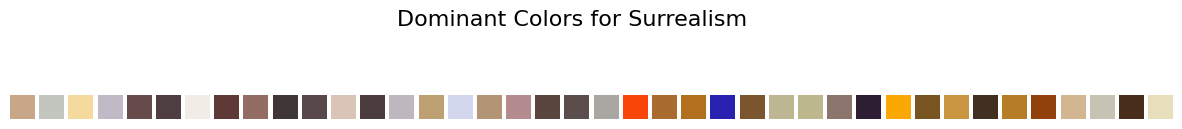

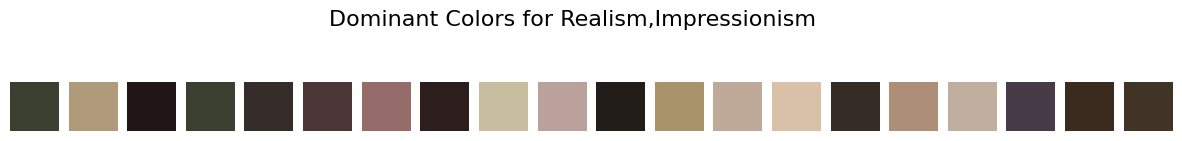

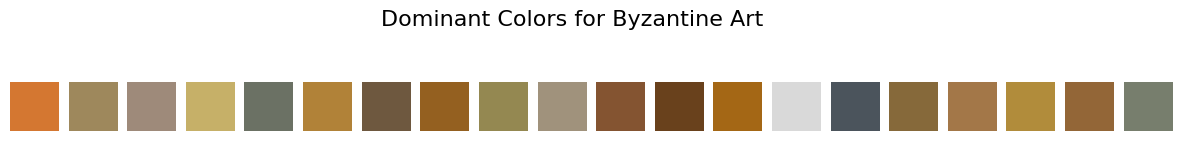

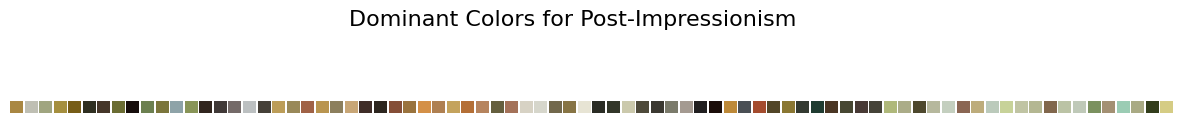

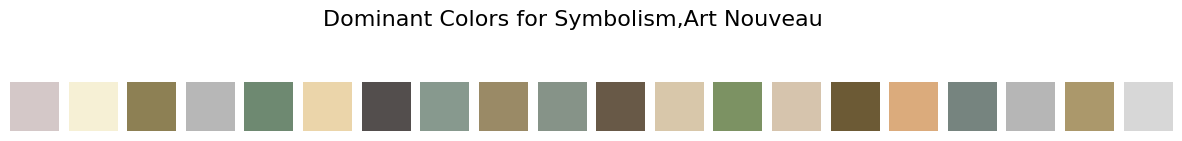

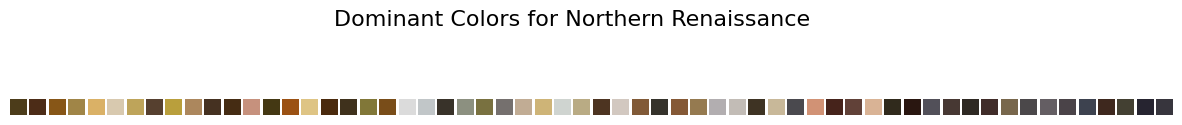

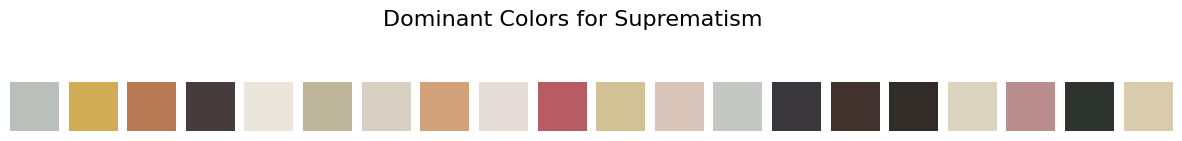

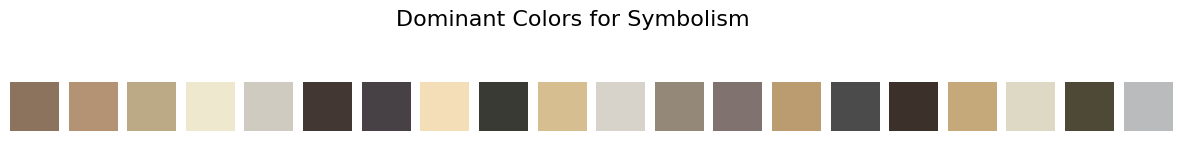

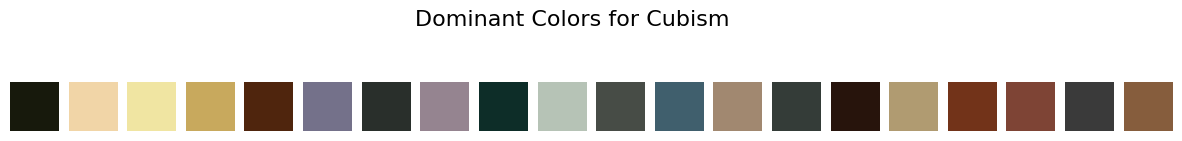

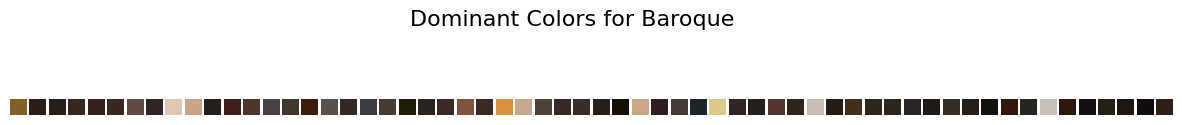

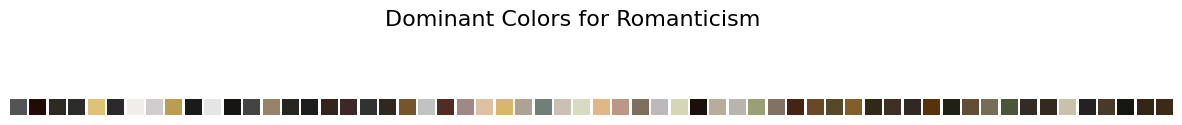

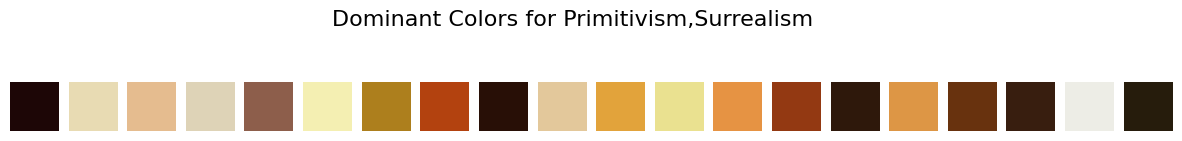

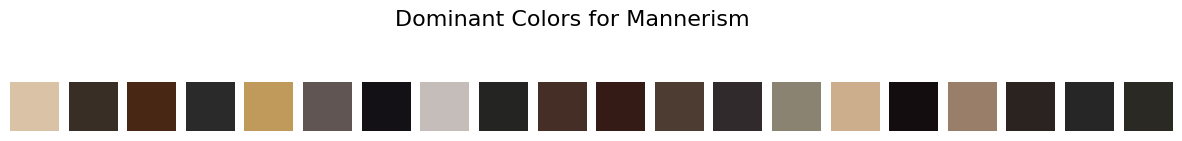

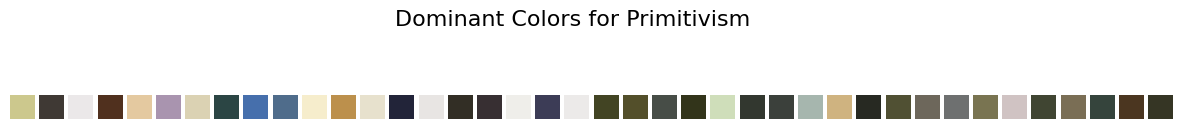

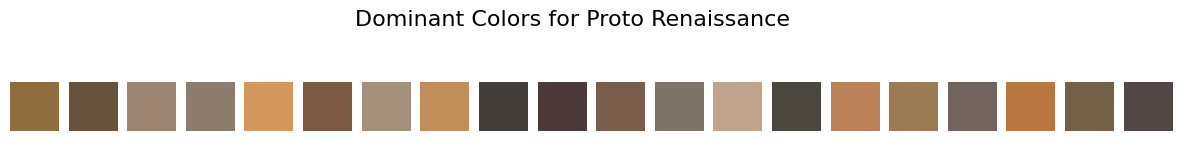

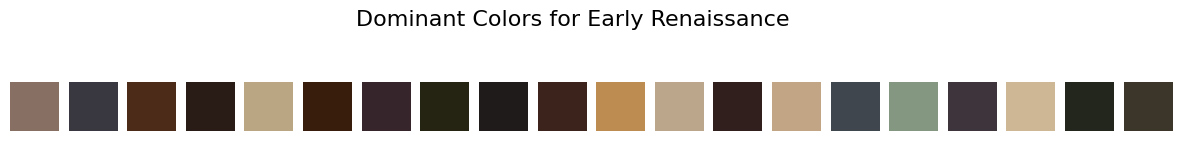

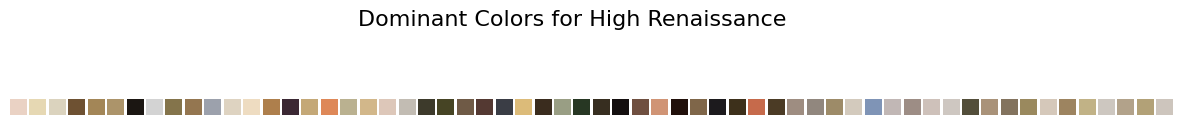

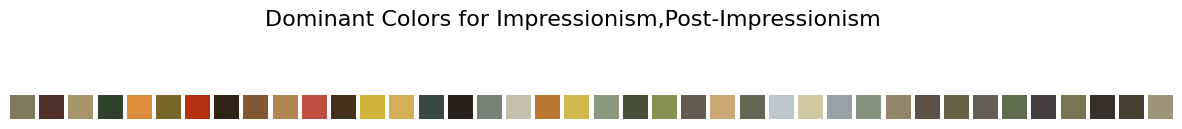

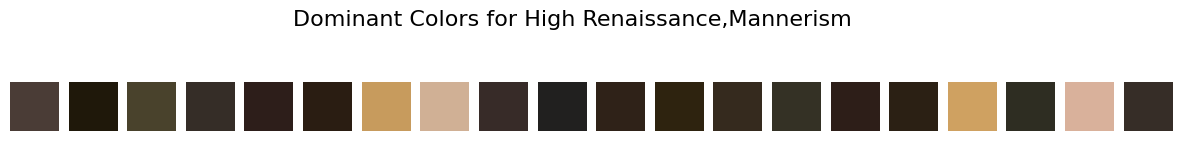

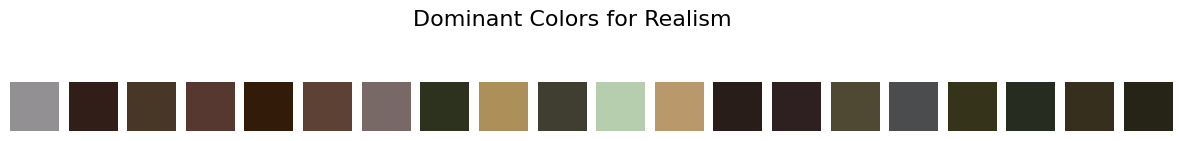

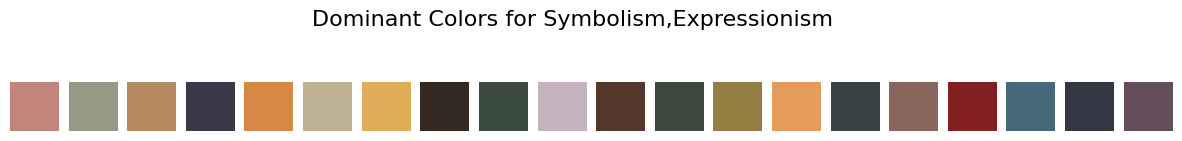

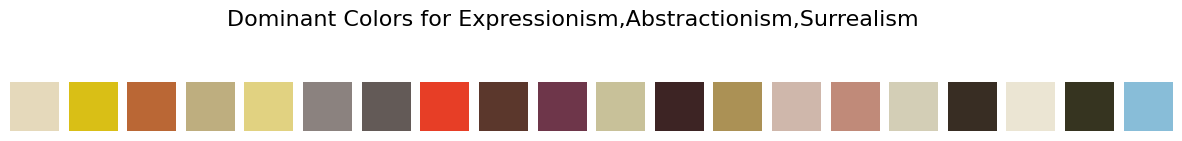

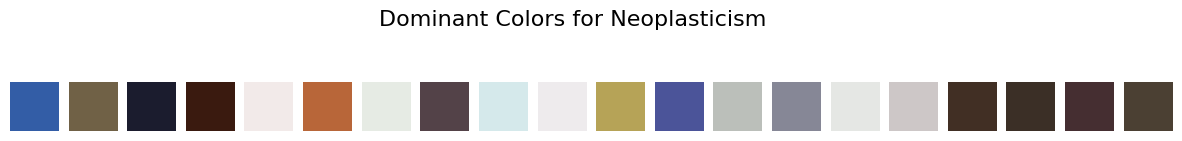

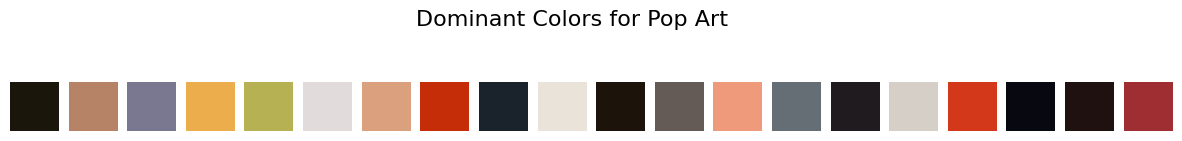

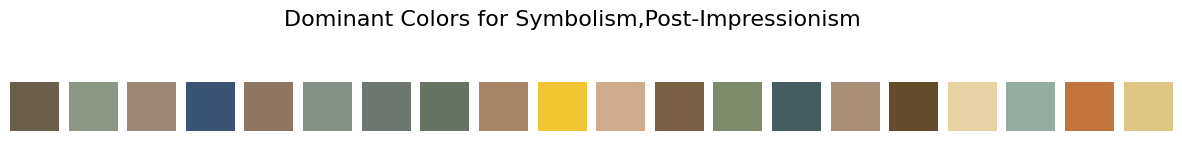

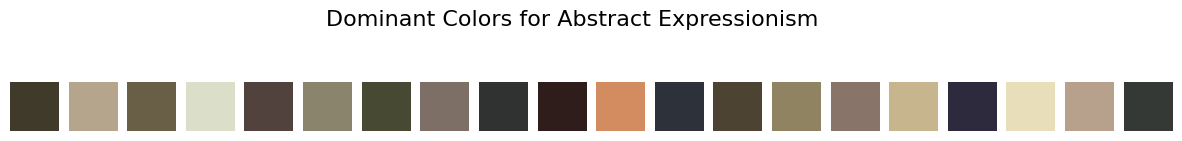

In [39]:
# visualizing dominant colors by genre
for genre_name in merged_df['artist_genre'].unique():
    genre_df = merged_df[merged_df['artist_genre'] == genre_name]
    plot_dominant_colors(genre_name, genre_df)

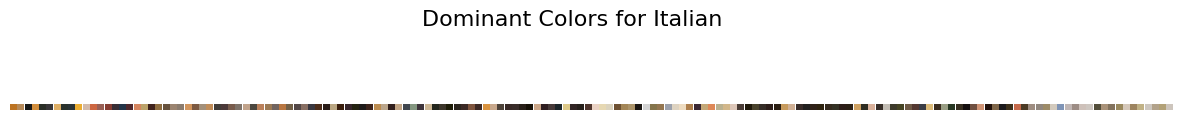

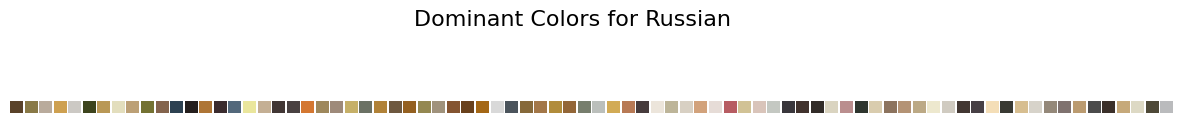

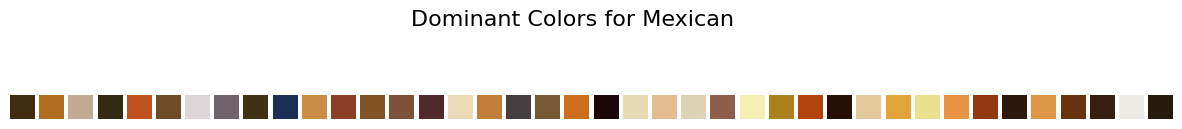

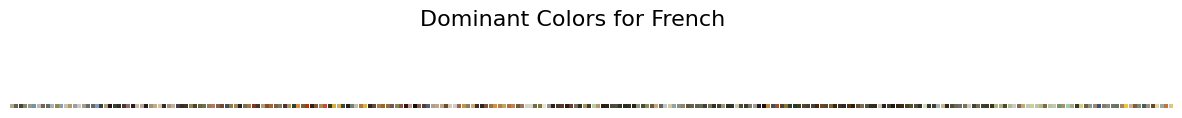

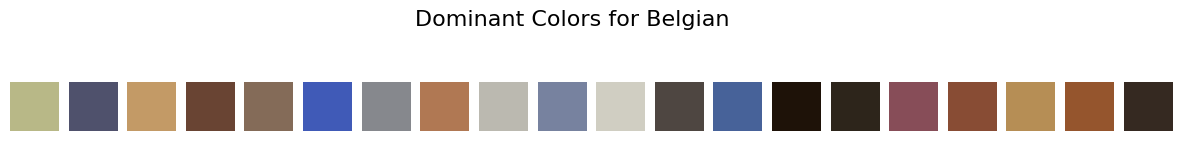

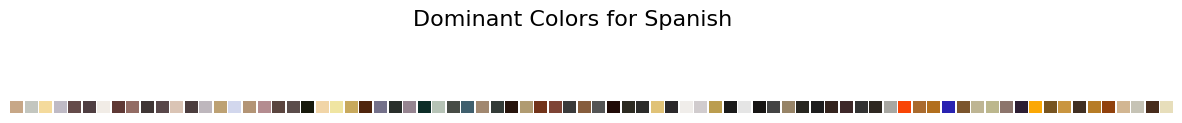

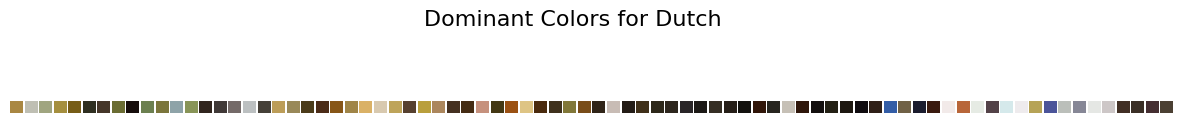

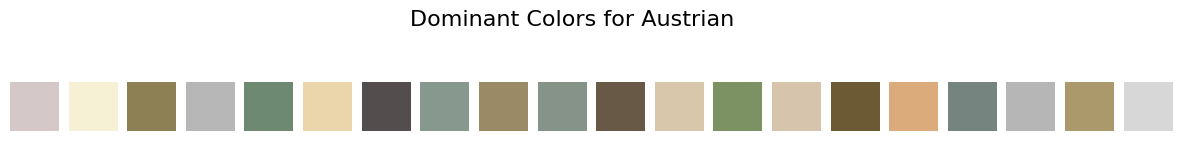

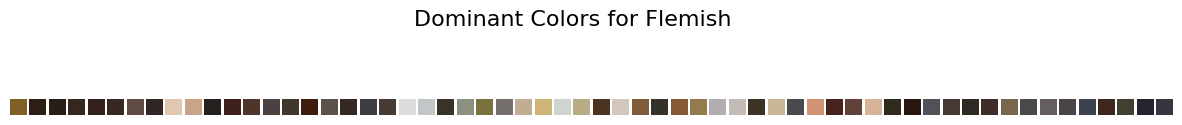

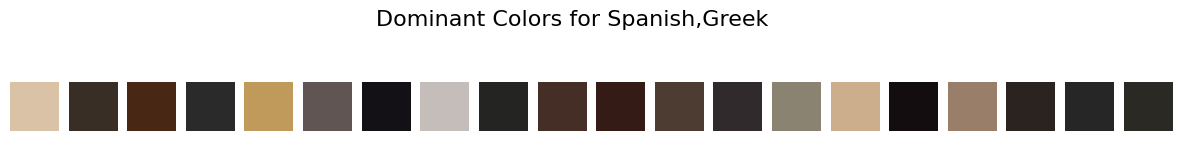

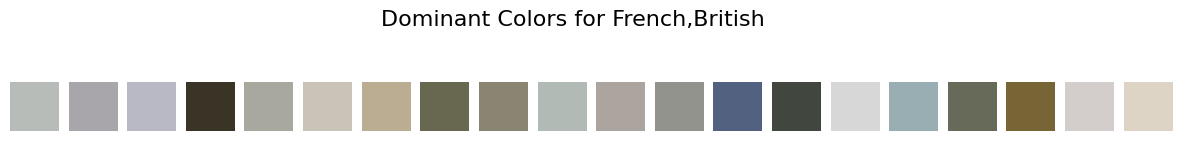

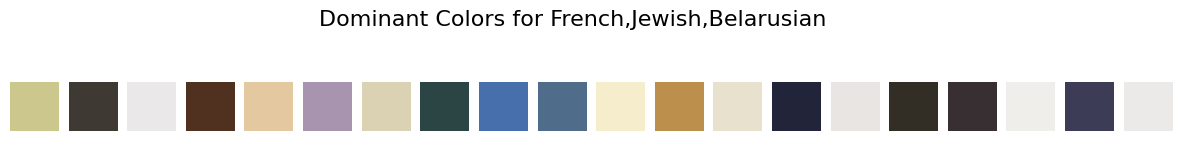

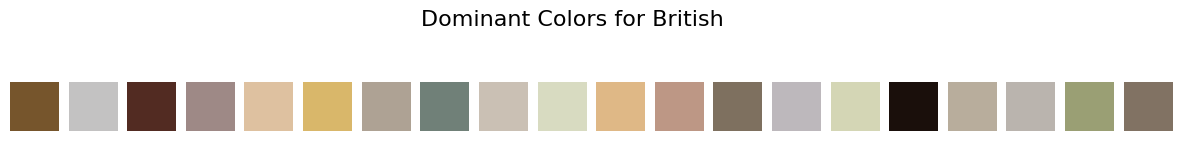

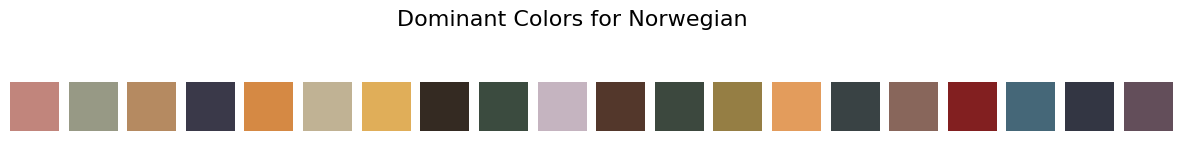

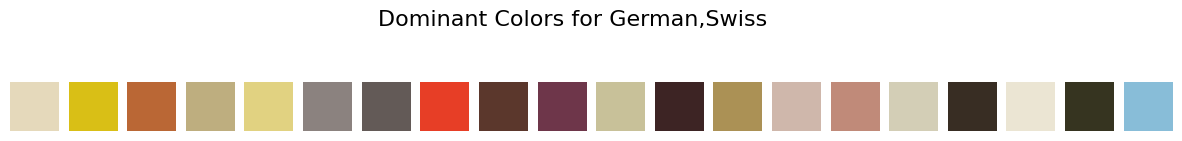

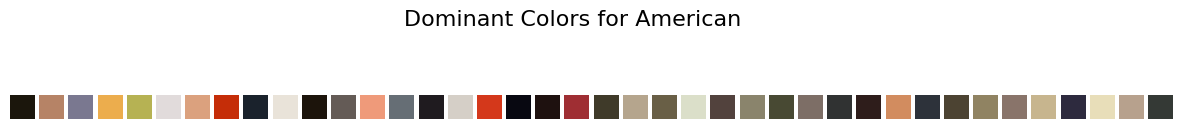

In [40]:
# visualizing dominant colors by nationality
for nationality_name in merged_df['artist_nationality'].unique():
    nationality_df = merged_df[merged_df['artist_nationality'] == nationality_name]
    plot_dominant_colors(nationality_name, nationality_df)

In [41]:
imgs['entropy'][imgs['image_name'] == 'Andy_Warhol_3.jpg']

861    6.859912
Name: entropy, dtype: float64